<a href="https://colab.research.google.com/github/Gressling/S88-NG/blob/main/ontology/Wikipage_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# go

In [ ]:
pip install networkx matplotlib

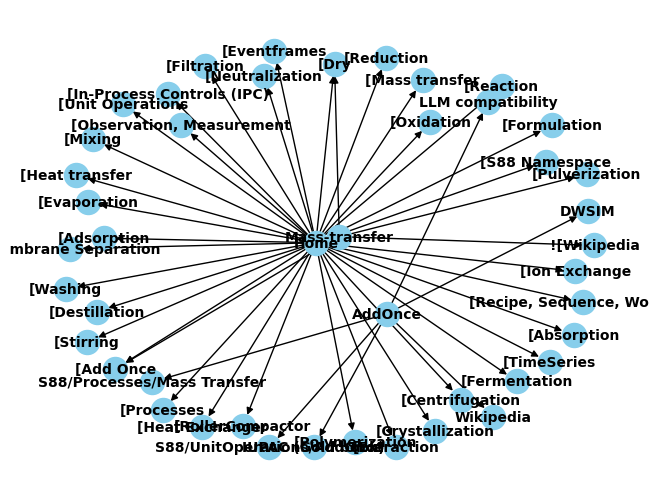

In [ ]:
import re
import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt

def get_page_content(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    return None

def extract_links(page_content):
    # Regular expression to extract links from the markup
    #link_pattern = r'\[\[([^|#\]]+)(?:\|([^\]]+))?\]\]'
    link_pattern = r'\[([^|#\]]+)(?:\|([^\]]+))?\]'
    links = re.findall(link_pattern, page_content)
    return links

def build_graph_from_links(page_links):
    G = nx.DiGraph()

    for page, link in page_links.items():
        links = extract_links(link)
        for linked_page, _ in links:
            G.add_edge(page, linked_page)

    return G

def visualize_graph(G):
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold')
    plt.show()

if __name__ == "__main__":
    # Sample links to the wiki pages (replace this with your own wiki page links)
    wiki_page_links = {
        "Home": "https://raw.githubusercontent.com/wiki/Gressling/S88/_Sidebar.md",
        "AddOnce": "https://raw.githubusercontent.com/wiki/Gressling/S88/Add-Once.md",
        "Mass-transfer": "https://raw.githubusercontent.com/wiki/Gressling/S88/Mass-transfer.md"
    }

    # Step 2: Crawl the wiki pages and extract the links
    wiki_pages = {}
    for page, link in wiki_page_links.items():
        content = get_page_content(link)
        wiki_pages[page] = content

    # Step 3: Build the graph from the links
    wiki_graph = build_graph_from_links(wiki_pages)

    # Step 4: Visualize the graph
    visualize_graph(wiki_graph)


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_graph_3d(G):
    # Get 3D positions for the nodes
    pos = nx.spring_layout(G, dim=3, seed=42)

    # Create 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot nodes
    for key, value in pos.items():
        xi, yi, zi = value[0], value[1], value[2]
        ax.scatter(xi, yi, zi, color='skyblue', s=100)
        ax.text(xi, yi, zi, '%s' % key, size=10, zorder=1, color='k')

    # Plot edges
    for edge in G.edges():
        x = [pos[edge[0]][0], pos[edge[1]][0]]
        y = [pos[edge[0]][1], pos[edge[1]][1]]
        z = [pos[edge[0]][2], pos[edge[1]][2]]
        ax.plot(x, y, z, color='k')

    plt.show()


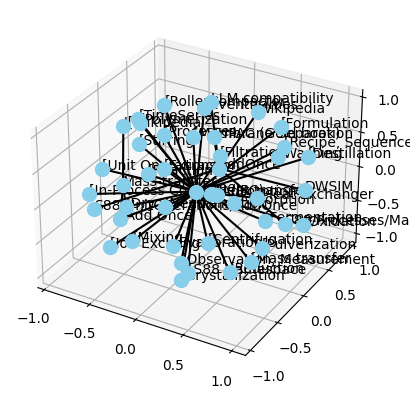

In [ ]:
import re
import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt

def get_page_content(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    return None

def extract_links(page_content):
    # Regular expression to extract links from the markup
    #link_pattern = r'\[\[([^|#\]]+)(?:\|([^\]]+))?\]\]'
    link_pattern = r'\[([^|#\]]+)(?:\|([^\]]+))?\]'
    links = re.findall(link_pattern, page_content)
    return links

def build_graph_from_links(page_links):
    G = nx.DiGraph()

    for page, link in page_links.items():
        links = extract_links(link)
        for linked_page, _ in links:
            G.add_edge(page, linked_page)

    return G

if __name__ == "__main__":
    # Sample links to the wiki pages (replace this with your own wiki page links)
    wiki_page_links = {
        "Home": "https://raw.githubusercontent.com/wiki/Gressling/S88/_Sidebar.md",
        "AddOnce": "https://raw.githubusercontent.com/wiki/Gressling/S88/Add-Once.md",
        "Mass-transfer": "https://raw.githubusercontent.com/wiki/Gressling/S88/Mass-transfer.md"
    }

    # Step 2: Crawl the wiki pages and extract the links
    wiki_pages = {}
    for page, link in wiki_page_links.items():
        content = get_page_content(link)
        wiki_pages[page] = content

    # Step 3: Build the graph from the links
    wiki_graph = build_graph_from_links(wiki_pages)

    # Step 4: Visualize the graph
    visualize_graph_3d(wiki_graph)

In [ ]:
!pip install plotly
import plotly.graph_objects as go


In [ ]:
import plotly.graph_objects as go

def visualize_graph_3d_plotly(G):
    pos = nx.spring_layout(G, dim=3, seed=42)

    # Extract node and edge information
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in G.edges():
        x0, y0, z0 = pos[edge[0]]
        x1, y1, z1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

    edge_trace = go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        mode='lines',
        line=dict(width=2, color='grey'),
        hoverinfo='none'
    )

    node_x = []
    node_y = []
    node_z = []
    for node in G.nodes():
        x, y, z = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_z.append(z)

    node_trace = go.Scatter3d(
        x=node_x, y=node_y, z=node_z,
        mode='markers+text',
        marker=dict(symbol='circle', size=10, color='skyblue'),
        text=list(G.nodes()),
        textposition='top center'
    )

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title='3D Visualization of Wiki Graph',
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0, l=0, r=0, t=0)
                    ))

    fig.show()

# Replace the call to the old visualization function with the new Plotly function:
# visualize_graph_3d_plotly(wiki_graph)


In [ ]:

    # Step 4: Visualize the graph
    visualize_graph_3d_plotly(wiki_graph)